In [37]:
%matplotlib inline
import sys, os, json, time, io
from collections import defaultdict
import cPickle as pickle

import numpy as np
from numpy import *
from numpy.random import *
from numpy.linalg import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
#sns.set_context("talk",font_scale=1.35)

from reader import reader_process
import utilsMetric


In [38]:
def plots_pvary(filename):
    data = reader_process(filename)
    recovery_err_nuc = defaultdict(list)
    recovery_err_L12 = defaultdict(list)

    norm_nuc = defaultdict(list)
    norm_L12 = defaultdict(list)
    d_val = data[0]['d']
    for run in data:
        keys = ['rel_err_list', 'n', 'd', 'p', 'step', 'start']
        risks, n, d, p, step, start = [run[k] for k in keys]
        tries_risk_nuc = start
        tries_risk_L12 = start
        for r in risks:
            if r[0] > .1:
                tries_risk_nuc += step
            if r[1] > .1:
                tries_risk_L12 += step
        #print 'd', d, tries_risk_nuc, tries_risk_L12
        norm_nuc[p].append(tries_risk_nuc)
        norm_L12[p].append(tries_risk_L12)

        # Samples to recovery error
#         recovery_samples_nuc = start
#         recovery_samples_L12 = start
#         Ktrue = np.eye(p)
#         for i in range(d, p):
#             Ktrue[i, i] = 0

#         for K in run['Ks'][1:]:
#             nuc_recovery = np.linalg.norm(
#                 Ktrue - K[0], 'fro')**2 / np.linalg.norm(Ktrue, 'fro')**2
#             L12_recovery = np.linalg.norm(
#                 Ktrue - K[1], 'fro')**2 / np.linalg.norm(Ktrue, 'fro')**2
#             if nuc_recovery > .10:
#                 recovery_samples_nuc += step
#             if L12_recovery > .10:
#                 recovery_samples_L12 += step

#         recovery_err_nuc[d].append(recovery_samples_nuc)
#         recovery_err_L12[d].append(recovery_samples_L12)
    x = sorted(norm_nuc.keys())
    print x
    plt.figure(figsize=(10,20))
    plt.subplot(211)
    plt.title('Samples to get relative excess_risk < .1 for d={}'.format(d_val))
    line1 = plt.errorbar(x, [np.mean(norm_nuc[p]) for p in x], yerr=[
                     np.std(norm_nuc[p]) for p in x], color='red', label='Nuclear Norm')
    line2 = plt.errorbar(x, [np.mean(norm_L12[p])
                         for p in x], yerr=[np.std(norm_L12[p]) for p in x], label='L12 Norm')
    plt.legend(handles=[line1, line2], loc=1)
    plt.xlabel('The dimension p')
    plt.ylabel('Number of Samples')


def plots(filename):
    data = reader_process(filename)
    recovery_err_nuc = defaultdict(list)
    recovery_err_L12 = defaultdict(list)

    norm_nuc = defaultdict(list)
    norm_L12 = defaultdict(list)
    for run in data:
        keys = ['rel_err_list', 'n', 'd', 'p', 'step', 'start']
        risks, n, d, p, step, start = [run[k] for k in keys]
        tries_risk_nuc = start
        tries_risk_L12 = start
        for r in risks:
            if r[0] > .1:
                tries_risk_nuc += step
            if r[1] > .1:
                tries_risk_L12 += step
        #print 'd', d, tries_risk_nuc, tries_risk_L12
        norm_nuc[d].append(tries_risk_nuc)
        norm_L12[d].append(tries_risk_L12)

        # Samples to recovery error
#         recovery_samples_nuc = start
#         recovery_samples_L12 = start
#         Ktrue = np.eye(p)
#         for i in range(d, p):
#             Ktrue[i, i] = 0

#         for K in run['Ks'][1:]:
#             nuc_recovery = np.linalg.norm(
#                 Ktrue - K[0], 'fro')**2 / np.linalg.norm(Ktrue, 'fro')**2
#             L12_recovery = np.linalg.norm(
#                 Ktrue - K[1], 'fro')**2 / np.linalg.norm(Ktrue, 'fro')**2
#             if nuc_recovery > .10:
#                 recovery_samples_nuc += step
#             if L12_recovery > .10:
#                 recovery_samples_L12 += step

#         recovery_err_nuc[d].append(recovery_samples_nuc)
#         recovery_err_L12[d].append(recovery_samples_L12)
    x = sorted(norm_nuc.keys())
    print x
    plt.figure(figsize=(10,20))
    plt.subplot(211)
    plt.title('Samples to get relative excess_risk < .1')
    line1 = plt.errorbar(x, [np.mean(norm_nuc[d]) for d in x], yerr=[
                     np.std(norm_nuc[d]) for d in x], color='red', label='Nuclear Norm')
    line2 = plt.errorbar(x, [np.mean(norm_L12[d])
                         for d in x], yerr=[np.std(norm_L12[d]) for d in x], label='L12 Norm')
    plt.legend(handles=[line1, line2], loc=1)
    plt.xlabel('The rank d')
    plt.ylabel('Number of Samples')
#     plt.subplot(212)
#     plt.title('Samples to get generalization error < .01')
#     plt.errorbar(x, [np.mean(recovery_err_nuc[d]) for d in x], yerr=[
#                  np.std(recovery_err_nuc[d]) for d in x], color='red')
#     plt.errorbar(x, [np.mean(recovery_err_L12[d])
#                      for d in x], yerr=[np.std(recovery_err_L12[d]) for d in x])
#     plt.show()


## Sparse Case, $p$ fixed $d$ varying

[5, 10, 15, 20, 25, 30, 35, 40, 45]


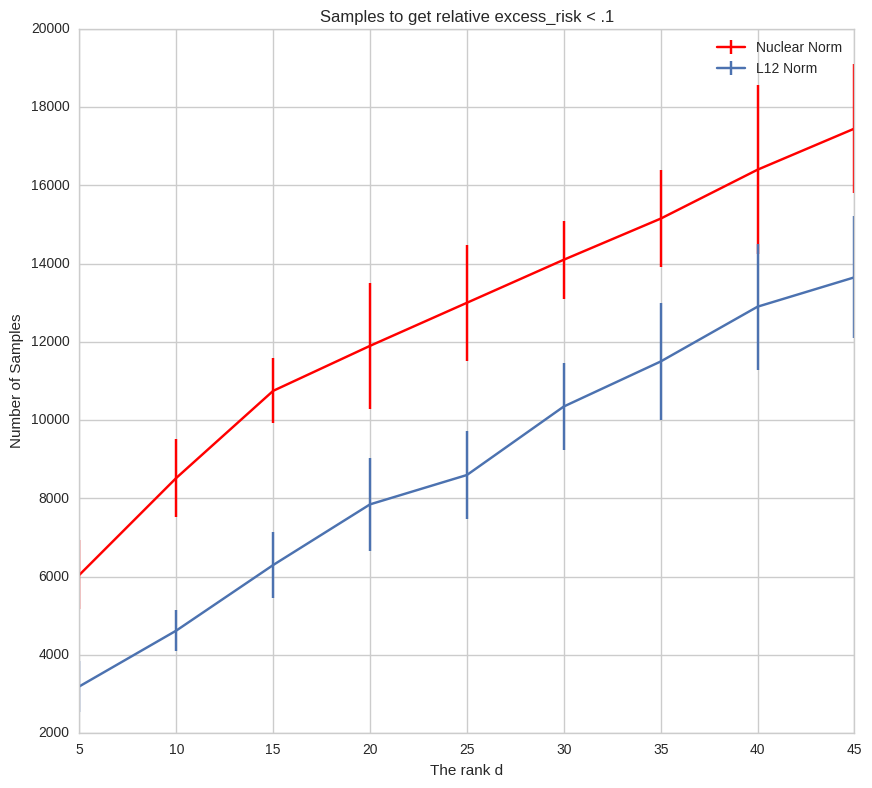

In [39]:
plots('sparse-results-n[60, 60, 60, 60, 60, 60, 60, 60, 60]-d[5, 10, 15, 20, 25, 30, 35, 40, 45]-p[50, 50, 50, 50, 50, 50, 50, 50, 50]-acc0.1-avg20.dat')
plt.show()

## Dense Case, $p$ fixed $d$ varying

[2, 4, 6, 8, 10, 12]


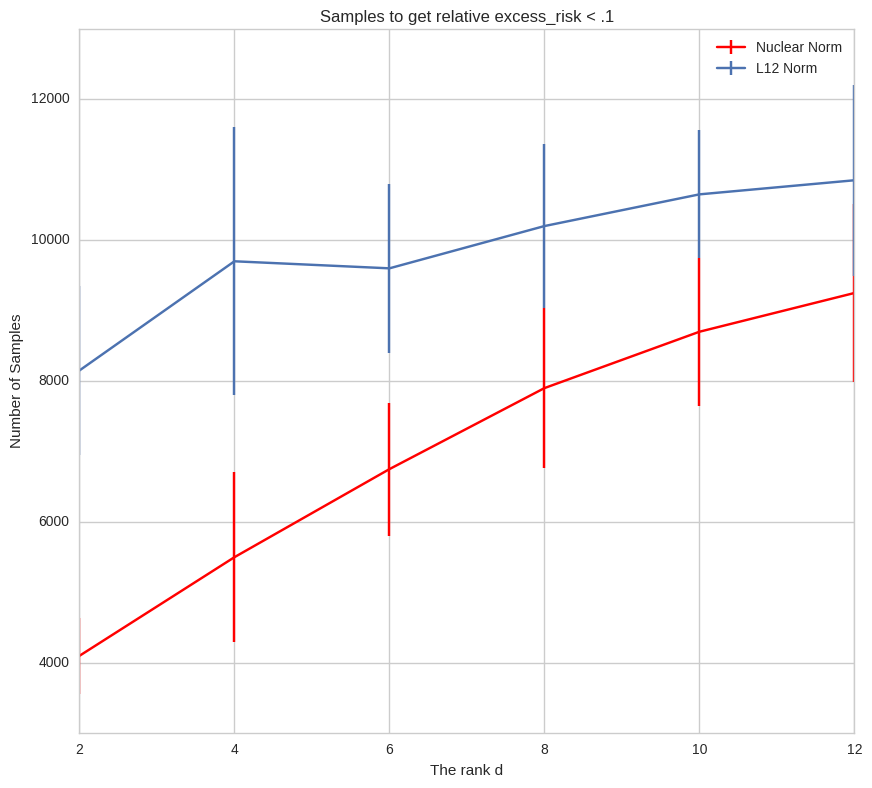

In [40]:
plots('dense-results-n[60, 60, 60, 60, 60, 60]-d[2, 4, 6, 8, 10, 12]-p[50, 50, 50, 50, 50, 50]-acc0.1-avg20.dat')
plt.show()

## Sparse Case, $p$ varying $d$ fixed

[10, 15, 20, 25, 30, 35, 40, 45, 50]


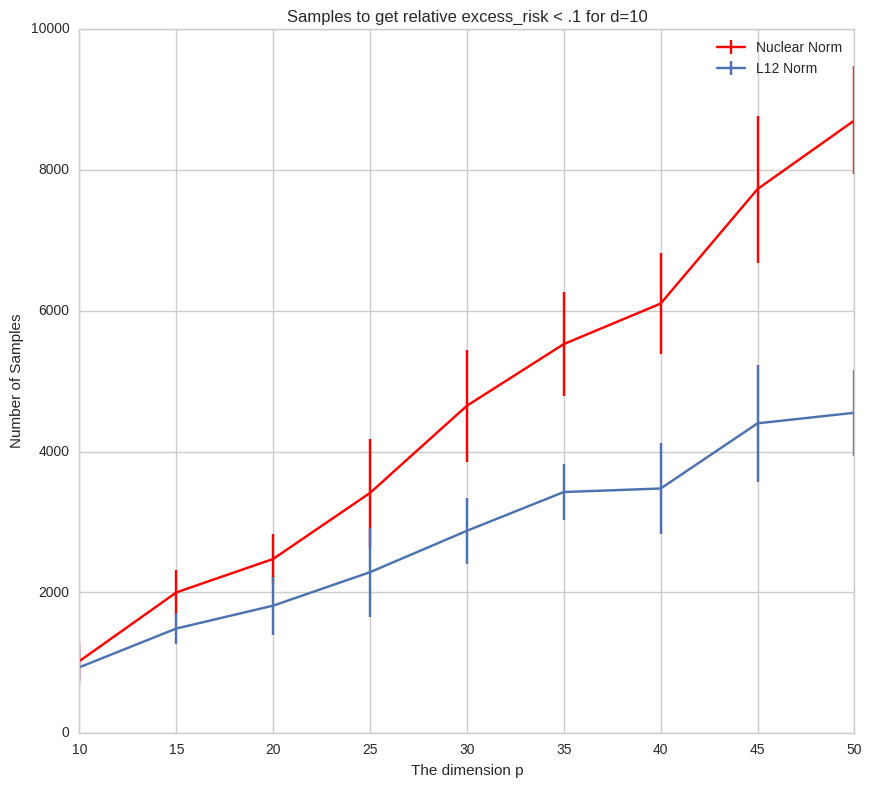

In [41]:
plots_pvary('sparse-results-n[60, 60, 60, 60, 60, 60, 60, 60, 60]-d[10, 10, 10, 10, 10, 10, 10, 10, 10]-p[10, 15, 20, 25, 30, 35, 40, 45, 50]-acc0.1-avg20.dat')
plt.show()

## Dense Case, $p$ varying $d$ fixed

[10, 15, 20, 25, 30, 35, 40, 45, 50]


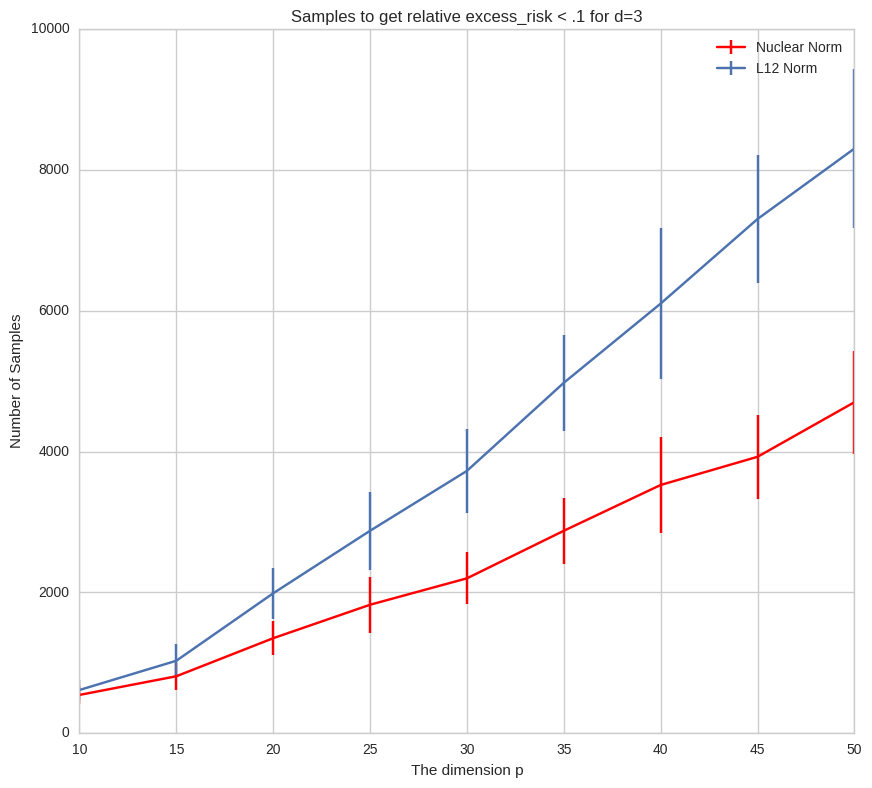

In [42]:
plots_pvary('dense-results-n[60, 60, 60, 60, 60, 60, 60, 60, 60]-d[3, 3, 3, 3, 3, 3, 3, 3, 3]-p[10, 15, 20, 25, 30, 35, 40, 45, 50]-acc0.1-avg20.dat')
plt.show()